# Image Super-Resolution using an Efficient Sub-Pixel CNN


In [ ]:
import keras
from keras import layers
#from keras import ops
from keras.utils import load_img
from keras.utils import array_to_img
from keras.utils import img_to_array
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf  #  only for data preprocessing

import os
import math
import numpy as np

from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Image resize code 481 * 321
'''
import os
from PIL import Image
import glob

def resize_and_rename_images(input_folder, output_folder, new_size=(481, 321)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get all image paths from the input folder
    image_paths = glob.glob(os.path.join(input_folder, '*'))

    for i, image_path in enumerate(image_paths):
        with Image.open(image_path) as img:
            # Resize the image
            img_resized = img.resize(new_size, Image.ANTIALIAS)
            # Define the new image path
            new_image_path = os.path.join(output_folder, f"{i+1:04d}.jpg")
            # Save the resized image to the new path
            img_resized.save(new_image_path)

input_folder = '/content/drive/MyDrive/BMBSD500/val'  # Example input folder
output_folder = '/content/drive/MyDrive/BM1BSD500/val'  # Example output folder

resize_and_rename_images(input_folder, output_folder)
'''

'\nimport os\nfrom PIL import Image\nimport glob\n\ndef resize_and_rename_images(input_folder, output_folder, new_size=(481, 321)):\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n\n    # Get all image paths from the input folder\n    image_paths = glob.glob(os.path.join(input_folder, \'*\'))\n\n    for i, image_path in enumerate(image_paths):\n        with Image.open(image_path) as img:\n            # Resize the image\n            img_resized = img.resize(new_size, Image.ANTIALIAS)\n            # Define the new image path\n            new_image_path = os.path.join(output_folder, f"{i+1:04d}.jpg")\n            # Save the resized image to the new path\n            img_resized.save(new_image_path)\n\ninput_folder = \'/content/drive/MyDrive/BMBSD500/val\'  # Example input folder\noutput_folder = \'/content/drive/MyDrive/BM1BSD500/val\'  # Example output folder\n\nresize_and_rename_images(input_folder, output_folder)\n'

## Load data: Bench mark BSDS500 dataset

### Download dataset

We use the built-in `keras.utils.get_file` utility to retrieve the dataset.

We create training and validation datasets via `image_dataset_from_directory`.

In [ ]:
import os

# Check the top-level directory
top_dir = '/content/drive/MyDrive'
if os.path.exists(top_dir):
    print("Top-level directory exists")
    print("Contents:", os.listdir(top_dir))
else:
    print("Top-level directory does not exist")

# Check the BSD500 directory
bsd500_dir = os.path.join(top_dir, 'BM1BSD500')
if os.path.exists(bsd500_dir):
    print("BM1BSD500 directory exists")
    print("Contents:", os.listdir(bsd500_dir))
else:
    print("BM1BSD500 directory does not exist")

# Check the data directory
data_dir = os.path.join(bsd500_dir, 'data')
if os.path.exists(data_dir):
    print("Data directory exists")
    print("Contents:", os.listdir(data_dir))
else:
    print("Data directory does not exist")


Top-level directory exists
Contents: ['Colab Notebooks', 'MGU-PhD CourseWork-Presentations', 'dataset', 'Deep Learning Workshop at MES', 'Super Resolution Read Papers', 'DC meetings', 'Account Details.xlsx', 'Conference Submissions', 'Expense sheet as on 28.11.23.xlsx', 'Prototyping presentation.gslides', 'Your big idea.gslides', 'RUSA', '20231219_145737.jpg', 'Computer Vision SAIR', 'Value Added Course MSc, SOCS', 'DATA at MGU', 'VID_266790716_213618_532.mp4', 'VID_20240119_161237.mp4', 'satellite.mp4', 'RCT1_NishaShamsudin.pdf', 'Project proposal.gdoc', 'Untitled document.gdoc', 'Strengthening Samarth ERP portal Proposal.gdoc', 'personal docs', 'PhD 2022 May', 'Scholars with mail id.gdoc', 'ACM_Brochures.docx', 'EUNOIA.pdf', 'Ph.D. Awarded 21.2.2024 EBX.docx', 'EUNOIA.gdoc', 'keems.docx', '3.4.5_All Teachers.xlsx', '3.4.5_WithoutSajimonSir(2).xlsx', 'Placement Details.pdf', 'Placement Details.gdoc', 'Placement Details.docx', 'Doc1828.pdf', 'EDUXLAB', 'Classroom', 'data.yaml', 'Resume

In [ ]:
import os
data_dir = '/content/drive/MyDrive/BM1BSD500'
images_dir = os.path.join(data_dir, "images")

# Verify the directory structure
for root, dirs, files in os.walk(images_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("")

# Ensure there are image files in the correct structure

Root: /content/drive/MyDrive/BM1BSD500/images
Directories: ['test', 'train', 'val']
Files: []

Root: /content/drive/MyDrive/BM1BSD500/images/test
Directories: []
Files: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0011.jpg', '0012.jpg', '0013.jpg', '0014.jpg', '0015.jpg', '0016.jpg', '0017.jpg', '0018.jpg', '0019.jpg', '0020.jpg', '0021.jpg', '0022.jpg', '0023.jpg', '0024.jpg', '0025.jpg', '0026.jpg', '0027.jpg', '0028.jpg', '0029.jpg', '0030.jpg', '0031.jpg', '0032.jpg', '0033.jpg', '0034.jpg', '0035.jpg', '0036.jpg', '0037.jpg', '0038.jpg', '0039.jpg', '0040.jpg', '0041.jpg', '0042.jpg', '0043.jpg', '0044.jpg', '0045.jpg', '0046.jpg', '0047.jpg', '0048.jpg', '0049.jpg', '0050.jpg', '0051.jpg', '0052.jpg', '0053.jpg', '0054.jpg', '0055.jpg', '0056.jpg', '0057.jpg', '0058.jpg', '0059.jpg', '0060.jpg', '0061.jpg', '0062.jpg', '0063.jpg', '0064.jpg', '0065.jpg', '0066.jpg', '0067.jpg', '0068.jpg', '0069.jpg', '0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

crop_size = 300
upscale_factor = 3
input_size = crop_size // upscale_factor
batch_size = 8

train_ds = image_dataset_from_directory(
    images_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode=None,
)

valid_ds = image_dataset_from_directory(
    images_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode=None,
)


Found 500 files belonging to 1 classes.
Using 400 files for training.
Found 500 files belonging to 1 classes.
Using 100 files for validation.


We rescale the images to take values in the range [0, 1].

In [ ]:

def scaling(input_image):
    input_image = input_image / 255.0
    return input_image


# Scale from (0, 255) to (0, 1)
train_ds = train_ds.map(scaling)
valid_ds = valid_ds.map(scaling)

Let's visualize a few sample images:

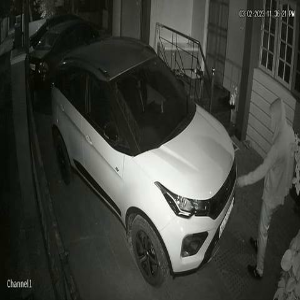

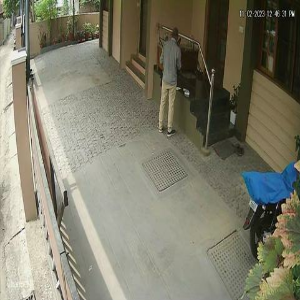

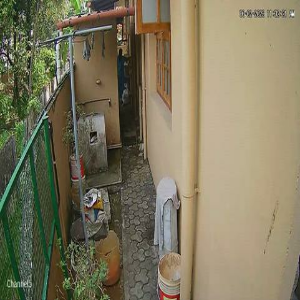

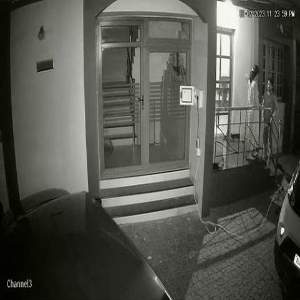

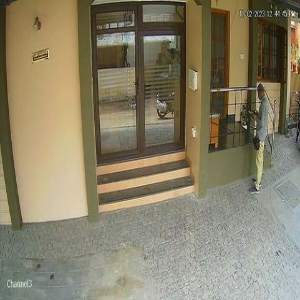

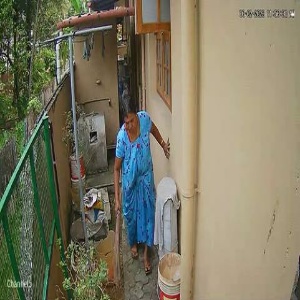

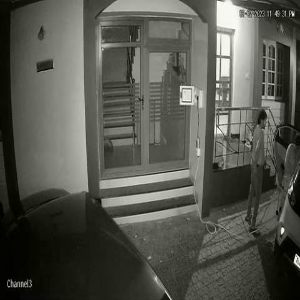

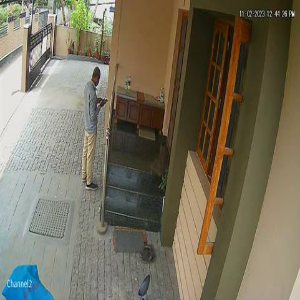

In [ ]:
for batch in train_ds.take(1):
    for img in batch:
        display(array_to_img(img))

We prepare a dataset of test image paths that we will use for
visual evaluation at the end of this example.

In [ ]:
import os

# Define the path to the images directory
data_dir = '/content/drive/MyDrive/BM1BSD500'
images_dir = os.path.join(data_dir, "images")
test_path = os.path.join(images_dir, "test")

# Verify the directory structure
for root, dirs, files in os.walk(images_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("")

# Get the list of test image paths
try:
    test_img_paths = sorted(
        [
            os.path.join(test_path, fname)
            for fname in os.listdir(test_path)
            if fname.endswith(".jpg")
        ]
    )

    # Print the list of test image paths to verify
    for path in test_img_paths:
        print(path)

except FileNotFoundError as e:
    print(f"Error: {e}")


Root: /content/drive/MyDrive/BM1BSD500/images
Directories: ['test', 'train', 'val']
Files: []

Root: /content/drive/MyDrive/BM1BSD500/images/test
Directories: []
Files: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0011.jpg', '0012.jpg', '0013.jpg', '0014.jpg', '0015.jpg', '0016.jpg', '0017.jpg', '0018.jpg', '0019.jpg', '0020.jpg', '0021.jpg', '0022.jpg', '0023.jpg', '0024.jpg', '0025.jpg', '0026.jpg', '0027.jpg', '0028.jpg', '0029.jpg', '0030.jpg', '0031.jpg', '0032.jpg', '0033.jpg', '0034.jpg', '0035.jpg', '0036.jpg', '0037.jpg', '0038.jpg', '0039.jpg', '0040.jpg', '0041.jpg', '0042.jpg', '0043.jpg', '0044.jpg', '0045.jpg', '0046.jpg', '0047.jpg', '0048.jpg', '0049.jpg', '0050.jpg', '0051.jpg', '0052.jpg', '0053.jpg', '0054.jpg', '0055.jpg', '0056.jpg', '0057.jpg', '0058.jpg', '0059.jpg', '0060.jpg', '0061.jpg', '0062.jpg', '0063.jpg', '0064.jpg', '0065.jpg', '0066.jpg', '0067.jpg', '0068.jpg', '0069.jpg', '0

## Crop and resize images

Let's process image data.
First, we convert our images from the RGB color space to the
[YUV colour space](https://en.wikipedia.org/wiki/YUV).

For the input data (low-resolution images),
we crop the image, retrieve the `y` channel (luninance),
and resize it with the `area` method (use `BICUBIC` if you use PIL).
We only consider the luminance channel
in the YUV color space because humans are more sensitive to
luminance change.

For the target data (high-resolution images), we just crop the image
and retrieve the `y` channel.

In [ ]:

# Use TF Ops to process.
def process_input(input, input_size, upscale_factor):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return tf.image.resize(y, [input_size, input_size], method="area")


def process_target(input):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return y


train_ds = train_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
train_ds = train_ds.prefetch(buffer_size=32)

valid_ds = valid_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
valid_ds = valid_ds.prefetch(buffer_size=32)

Let's take a look at the input and target data.

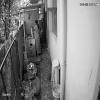

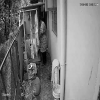

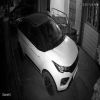

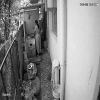

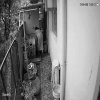

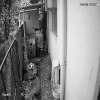

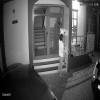

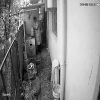

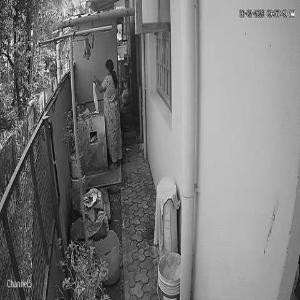

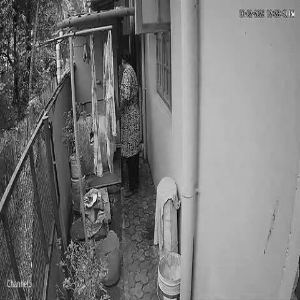

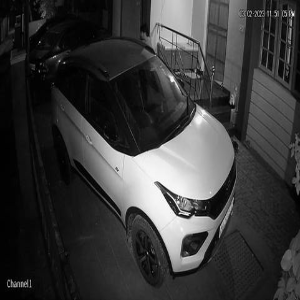

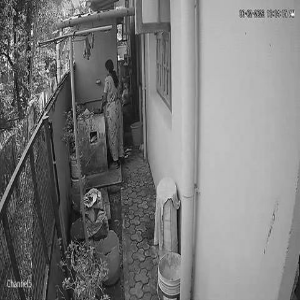

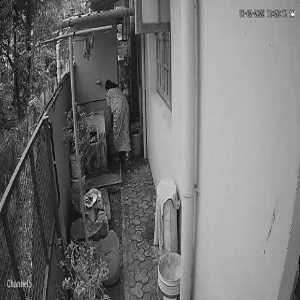

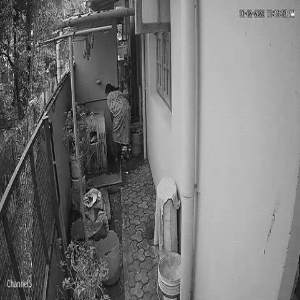

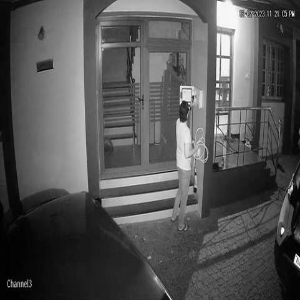

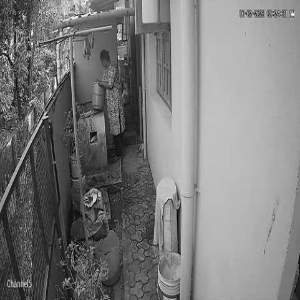

In [ ]:
for batch in train_ds.take(1):
    for img in batch[0]:
        display(array_to_img(img))
    for img in batch[1]:
        display(array_to_img(img))

## Build a model

Compared to the paper, we add one more layer and we use the `relu` activation function
instead of `tanh`.
It achieves better performance even though we train the model for fewer epochs.

In [ ]:

class DepthToSpace(layers.Layer):
    def __init__(self, block_size):
        super().__init__()
        self.block_size = block_size

    def call(self, input):
        batch, height, width, depth = ops.shape(input)
        depth = depth // (self.block_size**2)

        x = ops.reshape(
            input, [batch, height, width, self.block_size, self.block_size, depth]
        )
        x = ops.transpose(x, [0, 1, 3, 2, 4, 5])
        x = ops.reshape(
            x, [batch, height * self.block_size, width * self.block_size, depth]
        )
        return x


def get_model(upscale_factor=3, channels=1):
    conv_args = {
        "activation": "relu",
        "kernel_initializer": "orthogonal",
        "padding": "same",
    }
    inputs = keras.Input(shape=(None, None, channels))
    x = layers.Conv2D(64, 5, **conv_args)(inputs)
    x = layers.Conv2D(64, 3, **conv_args)(x)
    x = layers.Conv2D(32, 3, **conv_args)(x)
    x = layers.Conv2D(channels * (upscale_factor**2), 3, **conv_args)(x)
    outputs = DepthToSpace(upscale_factor)(x)

    return keras.Model(inputs, outputs)


## Define utility functions

We need to define several utility functions to monitor our results:

- `plot_results` to plot an save an image.
- `get_lowres_image` to convert an image to its low-resolution version.
- `upscale_image` to turn a low-resolution image to
a high-resolution version reconstructed by the model.
In this function, we use the `y` channel from the YUV color space
as input to the model and then combine the output with the
other channels to obtain an RGB image.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL


def plot_results(img, prefix, title):
    """Plot the result with zoom-in area."""
    img_array = img_to_array(img)
    img_array = img_array.astype("float32") / 255.0

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots()
    im = ax.imshow(img_array[::-1], origin="lower")

    plt.title(title)
    # zoom-factor: 2.0, location: upper-left
    axins = zoomed_inset_axes(ax, 2, loc=2)
    axins.imshow(img_array[::-1], origin="lower")

    # Specify the limits.
    x1, x2, y1, y2 = 200, 300, 100, 200
    # Apply the x-limits.
    axins.set_xlim(x1, x2)
    # Apply the y-limits.
    axins.set_ylim(y1, y2)

    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
    plt.savefig(str(prefix) + "-" + title + ".png")
    plt.show()


def get_lowres_image(img, upscale_factor):
    """Return low-resolution image to use as model input."""
    return img.resize(
        (img.size[0] // upscale_factor, img.size[1] // upscale_factor),
        PIL.Image.BICUBIC,
    )


def upscale_image(model, img):
    """Predict the result based on input image and restore the image as RGB."""
    ycbcr = img.convert("YCbCr")
    y, cb, cr = ycbcr.split()
    y = img_to_array(y)
    y = y.astype("float32") / 255.0

    input = np.expand_dims(y, axis=0)
    out = model.predict(input)

    out_img_y = out[0]
    out_img_y *= 255.0

    # Restore the image in RGB color space.
    out_img_y = out_img_y.clip(0, 255)
    out_img_y = out_img_y.reshape((np.shape(out_img_y)[0], np.shape(out_img_y)[1]))
    out_img_y = PIL.Image.fromarray(np.uint8(out_img_y), mode="L")
    out_img_cb = cb.resize(out_img_y.size, PIL.Image.BICUBIC)
    out_img_cr = cr.resize(out_img_y.size, PIL.Image.BICUBIC)
    out_img = PIL.Image.merge("YCbCr", (out_img_y, out_img_cb, out_img_cr)).convert(
        "RGB"
    )
    return out_img


## Define callbacks to monitor training

The `ESPCNCallback` object will compute and display
the [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) metric.
This is the main metric we use to evaluate super-resolution performance.

In [ ]:

class ESPCNCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.test_img = get_lowres_image(load_img(test_img_paths[0]), upscale_factor)

    # Store PSNR value in each epoch.
    def on_epoch_begin(self, epoch, logs=None):
        self.psnr = []

    def on_epoch_end(self, epoch, logs=None):
        print("Mean PSNR for epoch: %.2f" % (np.mean(self.psnr)))
        if epoch % 20 == 0:
            prediction = upscale_image(self.model, self.test_img)
            plot_results(prediction, "epoch-" + str(epoch), "prediction")

    def on_test_batch_end(self, batch, logs=None):
        self.psnr.append(10 * math.log10(1 / logs["loss"]))


Define `ModelCheckpoint` and `EarlyStopping` callbacks.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def DepthToSpace(block_size):
    def layer(x):
        return tf.nn.depth_to_space(x, block_size)
    return layers.Lambda(layer)

def get_model(upscale_factor, channels):
    input_shape = (None, None, channels)
    inputs = layers.Input(shape=input_shape)

    # Example architecture
    x = layers.Conv2D(64, kernel_size=5, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(channels * (upscale_factor ** 2), kernel_size=3, padding='same')(x)
    outputs = DepthToSpace(upscale_factor)(x)

    model = models.Model(inputs, outputs)
    return model


In [ ]:
from tensorflow import keras

# Callbacks
early_stopping_callback = keras.callbacks.EarlyStopping(monitor="loss", patience=10)
checkpoint_filepath = "/tmp/checkpoint.keras"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor="loss",
    mode="min",
    save_best_only=True,
)

# Model definition
model = get_model(upscale_factor=3, channels=1)  # Make sure upscale_factor is defined
model.summary()

# Compile the model
callbacks = [early_stopping_callback, model_checkpoint_callback]
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss_fn)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 64)    1664      
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    18464     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 9)     2601      
                                                                 
 lambda (Lambda)             (None, None, None, 1)     0         
                                                                 
Total params: 22729 (88.79 KB)
Trainable params: 22729 (88.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''
epochs = 1  # Define the number of epochs

model.fit(
    train_ds,
    epochs=epochs,
    validation_data=valid_ds,
    callbacks=callbacks,
)
'''

## Train the model

In [ ]:
epochs = 100

model.compile(
    optimizer=optimizer,
    loss=loss_fn,
)

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=valid_ds, verbose=2
)

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

Epoch 1/100
50/50 - 40s - loss: 0.0338 - val_loss: 0.0082 - 40s/epoch - 808ms/step
Epoch 2/100
50/50 - 30s - loss: 0.0062 - val_loss: 0.0046 - 30s/epoch - 606ms/step
Epoch 3/100
50/50 - 31s - loss: 0.0042 - val_loss: 0.0040 - 31s/epoch - 620ms/step
Epoch 4/100
50/50 - 31s - loss: 0.0035 - val_loss: 0.0032 - 31s/epoch - 613ms/step
Epoch 5/100
50/50 - 30s - loss: 0.0031 - val_loss: 0.0029 - 30s/epoch - 595ms/step
Epoch 6/100
50/50 - 30s - loss: 0.0029 - val_loss: 0.0027 - 30s/epoch - 609ms/step
Epoch 7/100
50/50 - 31s - loss: 0.0028 - val_loss: 0.0026 - 31s/epoch - 613ms/step
Epoch 8/100
50/50 - 30s - loss: 0.0027 - val_loss: 0.0025 - 30s/epoch - 600ms/step
Epoch 9/100
50/50 - 32s - loss: 0.0026 - val_loss: 0.0025 - 32s/epoch - 634ms/step
Epoch 10/100
50/50 - 31s - loss: 0.0026 - val_loss: 0.0026 - 31s/epoch - 620ms/step
Epoch 11/100
50/50 - 31s - loss: 0.0026 - val_loss: 0.0024 - 31s/epoch - 617ms/step
Epoch 12/100
50/50 - 37s - loss: 0.0025 - val_loss: 0.0024 - 37s/epoch - 732ms/step
E

## Run model prediction and plot the results

Let's compute the reconstructed version of a few images and save the results.

1/1 [==============================] - 0s 221ms/step
PSNR of low resolution image and high resolution image is 28.8735
PSNR of predict and high resolution is 29.2784


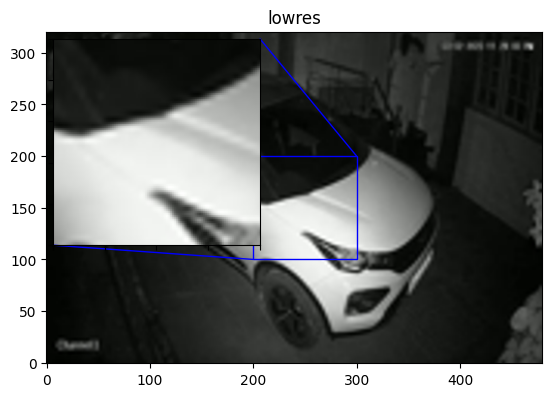

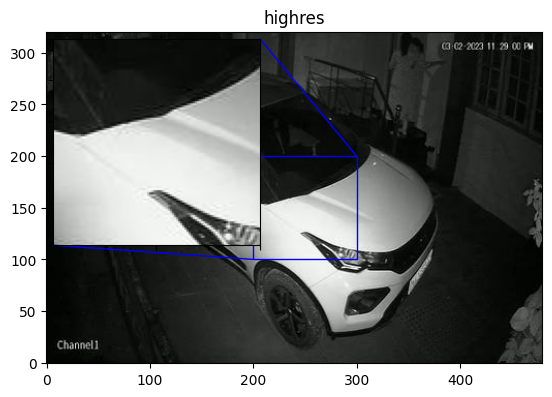

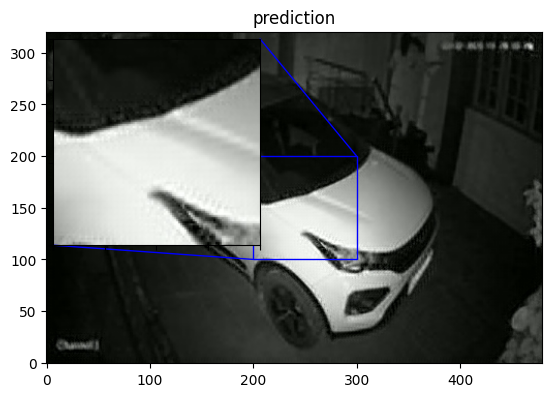

1/1 [==============================] - 0s 42ms/step
PSNR of low resolution image and high resolution image is 27.9958
PSNR of predict and high resolution is 28.4060


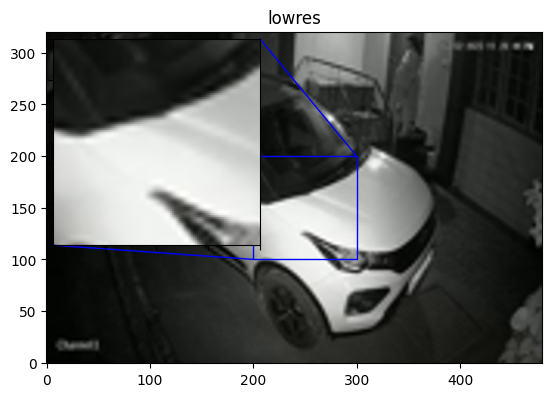

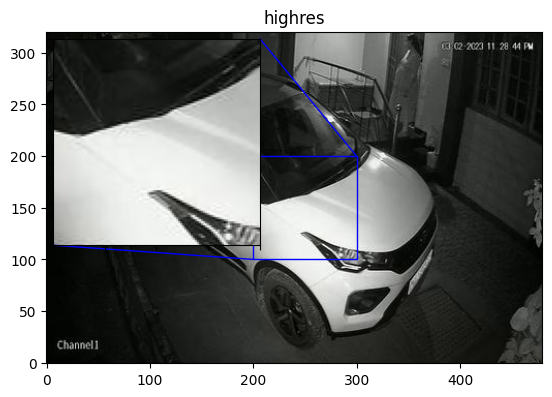

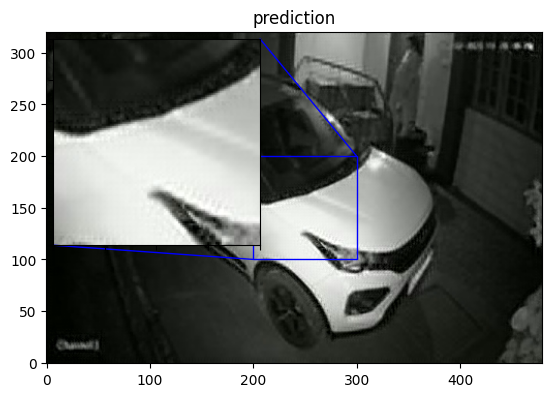

1/1 [==============================] - 0s 51ms/step
PSNR of low resolution image and high resolution image is 28.0399
PSNR of predict and high resolution is 28.4755


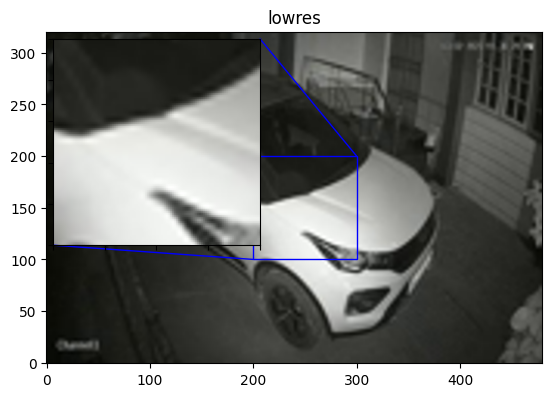

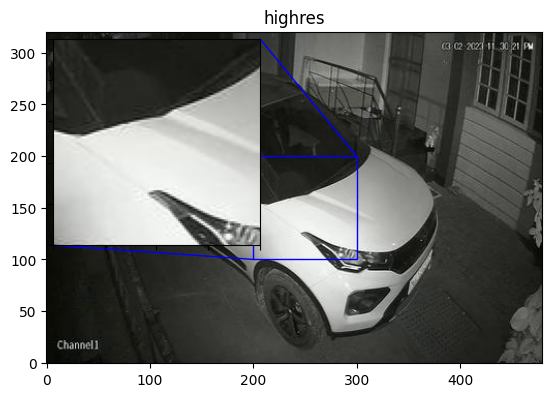

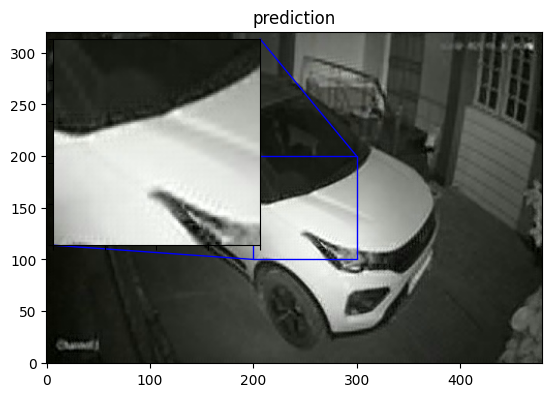

1/1 [==============================] - 0s 73ms/step
PSNR of low resolution image and high resolution image is 28.0765
PSNR of predict and high resolution is 28.5066


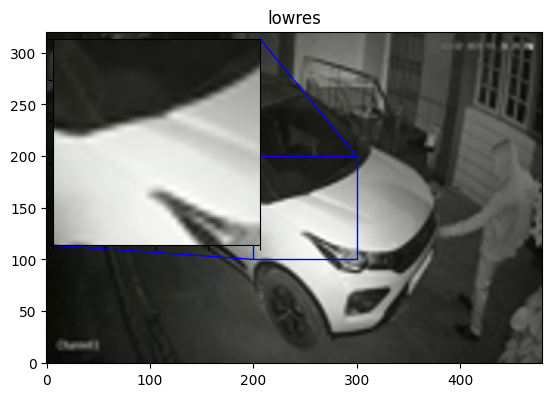

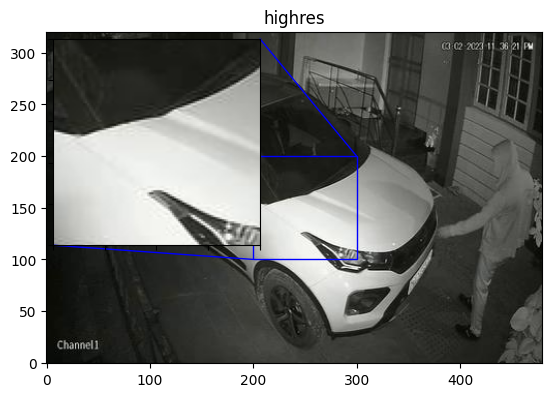

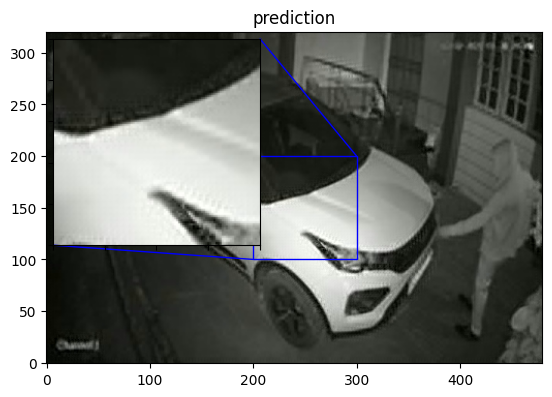

1/1 [==============================] - 0s 77ms/step
PSNR of low resolution image and high resolution image is 28.1159
PSNR of predict and high resolution is 28.5428


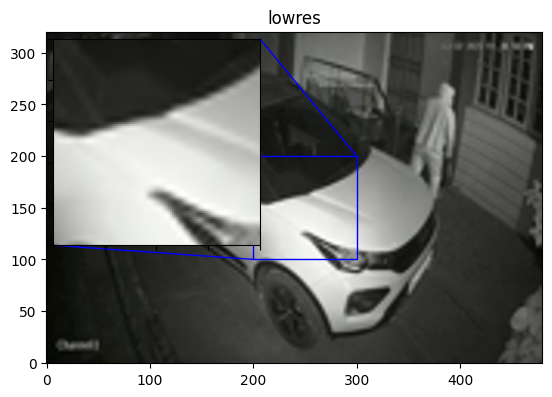

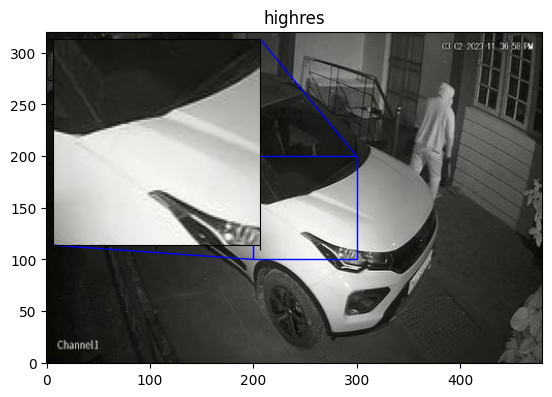

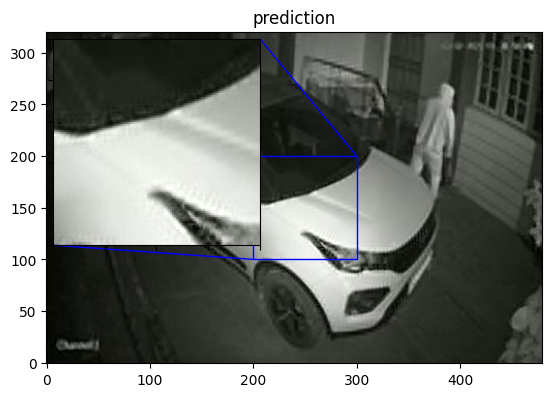

1/1 [==============================] - 0s 63ms/step
PSNR of low resolution image and high resolution image is 28.1779
PSNR of predict and high resolution is 28.5660


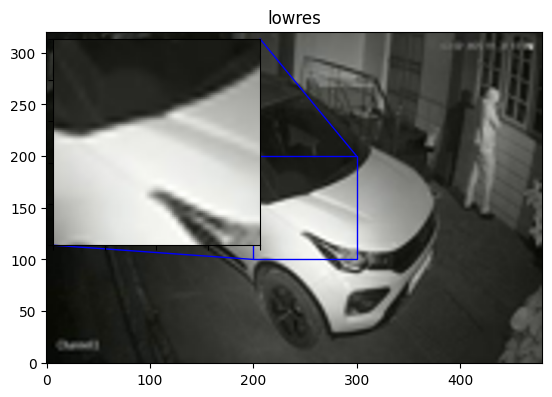

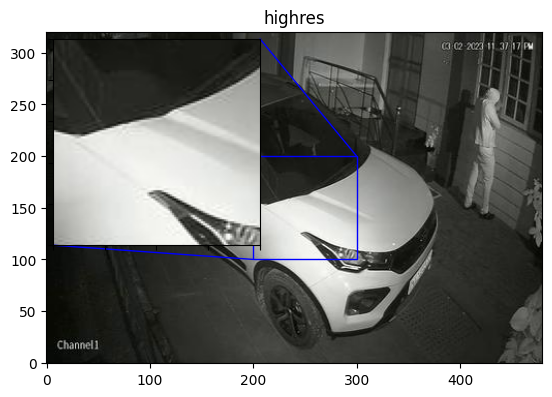

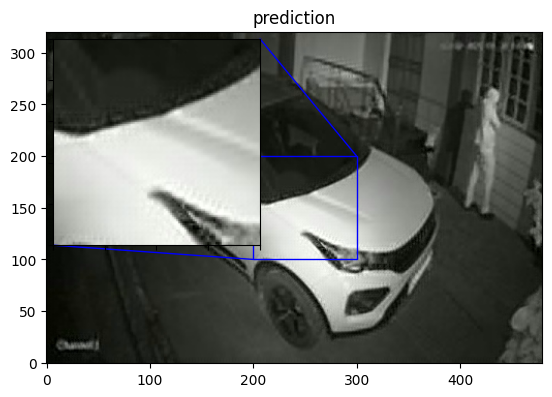

1/1 [==============================] - 0s 44ms/step
PSNR of low resolution image and high resolution image is 28.9564
PSNR of predict and high resolution is 29.2683


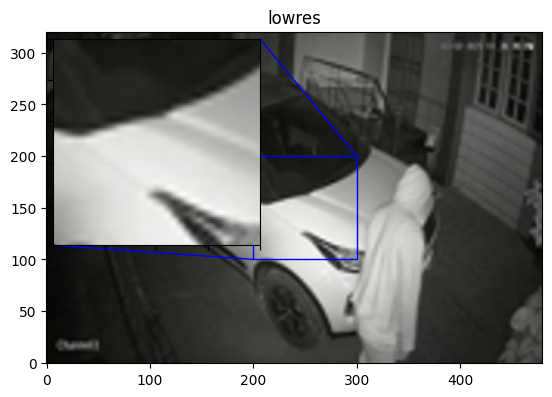

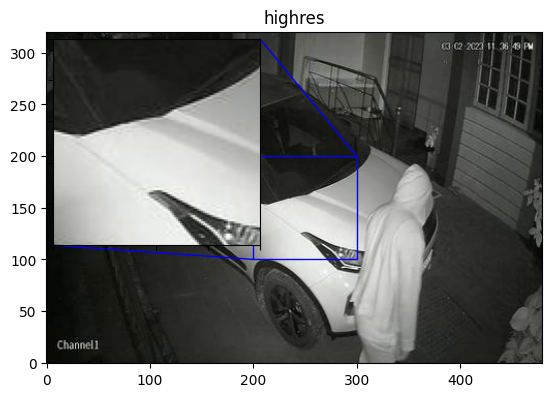

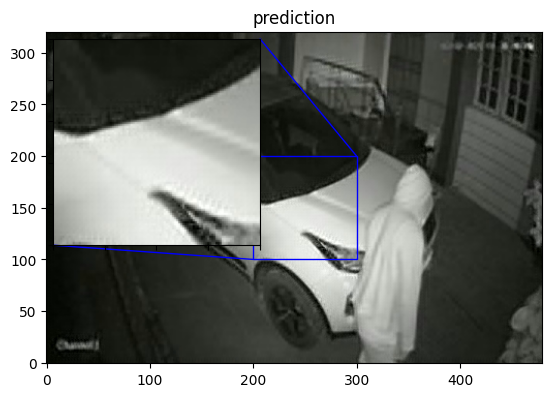

1/1 [==============================] - 0s 44ms/step
PSNR of low resolution image and high resolution image is 28.1315
PSNR of predict and high resolution is 28.5791


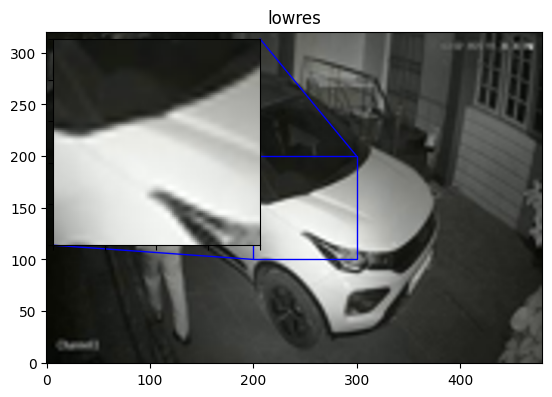

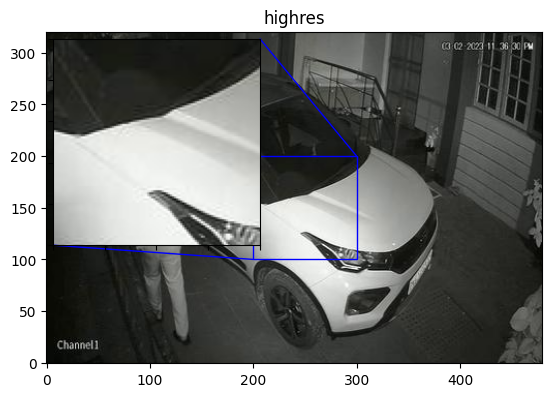

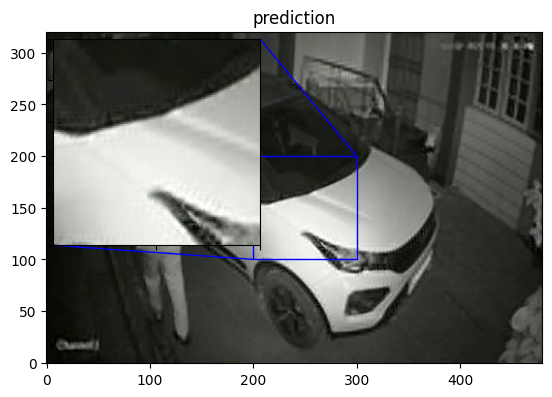

1/1 [==============================] - 0s 70ms/step
PSNR of low resolution image and high resolution image is 28.1355
PSNR of predict and high resolution is 28.5592


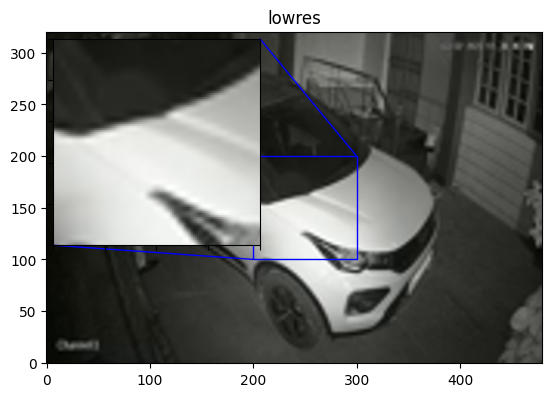

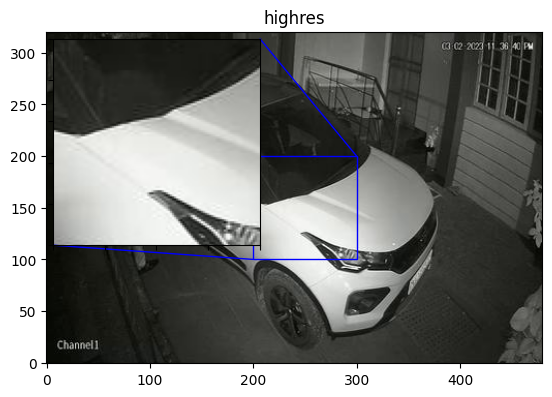

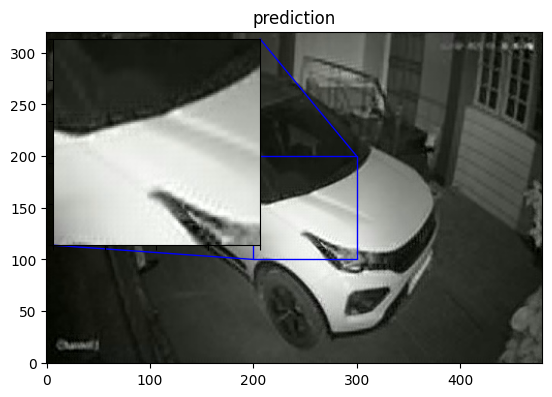

1/1 [==============================] - 0s 77ms/step
PSNR of low resolution image and high resolution image is 28.0677
PSNR of predict and high resolution is 28.5195


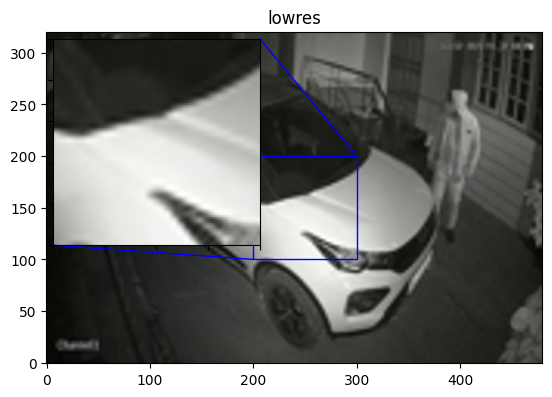

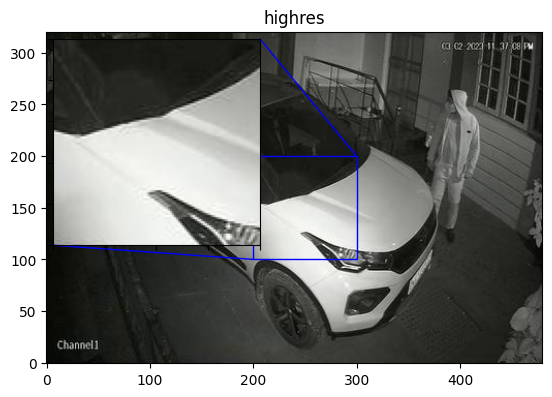

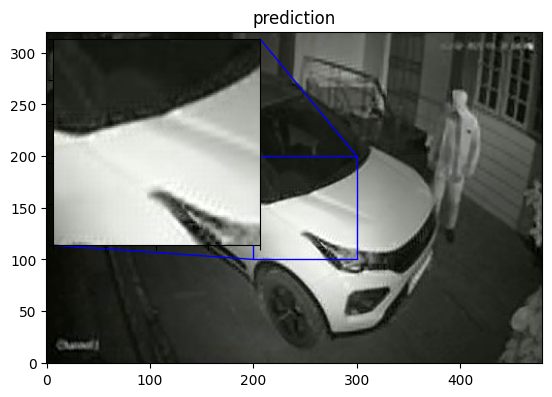

Avg. PSNR of lowres images is 28.2571
Avg. PSNR of reconstructions is 28.6701


In [ ]:
total_bicubic_psnr = 0.0
total_test_psnr = 0.0

for index, test_img_path in enumerate(test_img_paths[50:60]):
    img = load_img(test_img_path)
    lowres_input = get_lowres_image(img, upscale_factor)
    w = lowres_input.size[0] * upscale_factor
    h = lowres_input.size[1] * upscale_factor
    highres_img = img.resize((w, h))
    prediction = upscale_image(model, lowres_input)
    lowres_img = lowres_input.resize((w, h))
    lowres_img_arr = img_to_array(lowres_img)
    highres_img_arr = img_to_array(highres_img)
    predict_img_arr = img_to_array(prediction)
    bicubic_psnr = tf.image.psnr(lowres_img_arr, highres_img_arr, max_val=255)
    test_psnr = tf.image.psnr(predict_img_arr, highres_img_arr, max_val=255)

    total_bicubic_psnr += bicubic_psnr
    total_test_psnr += test_psnr

    print(
        "PSNR of low resolution image and high resolution image is %.4f" % bicubic_psnr
    )
    print("PSNR of predict and high resolution is %.4f" % test_psnr)
    plot_results(lowres_img, index, "lowres")
    plot_results(highres_img, index, "highres")
    plot_results(prediction, index, "prediction")

print("Avg. PSNR of lowres images is %.4f" % (total_bicubic_psnr / 10))
print("Avg. PSNR of reconstructions is %.4f" % (total_test_psnr / 10))